# 1. Problem Statement
* In this notebook we will learn how to implement how to apply logistic regression in a real world data. We are using open kaglle data set named, "Rain in Australia". It is a 10 year historical rainfall data that comes in csv file format. After doing primary data exploration, we will try to predict next day rainfall for different regions in australia.

# 2. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 3.Loading the data

In [2]:
aus = pd.read_csv('weatherAUS.csv')
aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# 4. Exploratory Data Analysis with Visualisation

In [3]:
aus.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# 5.Checking the null values

In [4]:
aus.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
aus.shape

(145460, 23)

In [6]:
aus.size

3345580

In [7]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Checking for the categorical values

In [8]:
categorical = [var for var in aus.columns if aus[var].dtype=='O']
print('There are {} categorical values\n'.format(len(categorical)))
print('The categorical values are:',categorical)

There are 7 categorical values

The categorical values are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
object_col = []
numeric_val=[]

for rain in aus.columns:
    
    if aus[rain].dtype == 'object':
        object_col.append(rain)
    else:
        numeric_val.append(rain)
        
print("the categorial values are :" ,object_col)
print()
print()
print("the numerical values are :" ,numeric_val)

the categorial values are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


the numerical values are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
aus.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
col  = aus.columns
col
for column in col:
    print(column,'--> ', aus[column].unique())

Date -->  ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location -->  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
MinTemp -->  [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12

In [12]:
aus.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
aus.isnull().sum().sum()

343248

# 6 .Checking outliers with visulaization by seaborn

In [14]:
import seaborn as sns

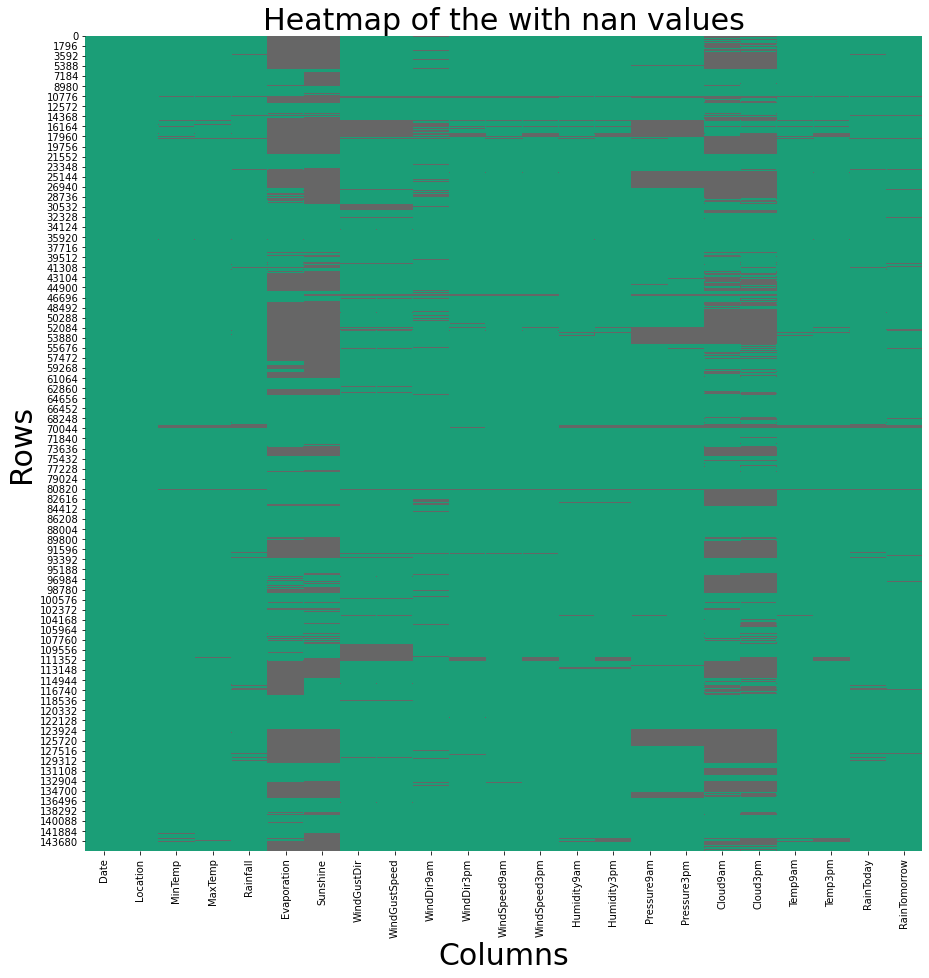

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(aus.isnull(),cbar=False,cmap='Dark2')
plt.title("Heatmap of the with nan values",fontsize=30)
plt.xlabel("Columns",fontsize=30)
plt.ylabel("Rows",fontsize=30)
plt.show()

## 7. Mapping of Raintoday,Raintomorrow feature with 1 as yes as and 0 as no

In [16]:
aus['RainToday'] = aus['RainToday'].map({'Yes':1,'No':0})
aus['RainToday']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64

In [17]:
aus['RainTomorrow'] = aus['RainTomorrow'].map({'Yes':1,'No':0})
aus['RainTomorrow']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64

# 8. Checking the categorical values to impute with mode

In [18]:
categorical = [var for var in aus.columns if aus[var].dtype=='O']
print('There are {} categorical values\n'.format(len(categorical)))
print('The categorical values are:',categorical)

There are 5 categorical values

The categorical values are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


# 9. Checking the numerical values to impute with mean

In [19]:
numerical = [var for var in aus.columns if aus[var].dtype!='O']
print('There are {} numerical values\n'.format(len(numerical)))
print('The numerical values are:',numerical)

There are 18 numerical values

The numerical values are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


## 10.imputing numerical with mean

In [20]:
aus['MinTemp']=aus['MinTemp'].fillna(aus['MinTemp'].mean())
aus['MaxTemp']=aus['MaxTemp'].fillna(aus['MaxTemp'].mean())
aus['Rainfall']=aus['Rainfall'].fillna(aus['Rainfall'].mean())
aus['Evaporation']=aus['Evaporation'].fillna(aus['Evaporation'].mean())
aus['Sunshine']=aus['Sunshine'].fillna(aus['Sunshine'].mean())
aus['WindGustSpeed']=aus['WindGustSpeed'].fillna(aus['WindGustSpeed'].mean())
aus['WindSpeed9am']=aus['WindSpeed9am'].fillna(aus['WindSpeed9am'].mean())
aus['WindSpeed3pm']=aus['WindSpeed3pm'].fillna(aus['WindSpeed3pm'].mean())
aus['Humidity9am']=aus['Humidity9am'].fillna(aus['Humidity9am'].mean())
aus['Humidity3pm']=aus['Humidity3pm'].fillna(aus['Humidity3pm'].mean())
aus['Pressure9am']=aus['Pressure9am'].fillna(aus['Pressure9am'].mean())
aus['Pressure3pm']=aus['Pressure3pm'].fillna(aus['Pressure3pm'].mean())
aus['Cloud9am']=aus['Cloud9am'].fillna(aus['Cloud9am'].mean())
aus['Cloud3pm']=aus['Cloud3pm'].fillna(aus['Cloud3pm'].mean())
aus['Temp9am']=aus['Temp9am'].fillna(aus['Temp9am'].mean())
aus['Temp3pm']=aus['Temp3pm'].fillna(aus['Temp3pm'].mean())

## 11. imputing the categorical with mode

In [21]:
aus['RainToday']=aus['RainToday'].fillna(aus['RainToday'].mode()[0])
aus['RainTomorrow']=aus['RainTomorrow'].fillna(aus['RainTomorrow'].mode()[0])

aus['WindDir9am'] = aus['WindDir9am'].fillna(aus['WindDir9am'].mode()[0])
aus['WindGustDir'] = aus['WindGustDir'].fillna(aus['WindGustDir'].mode()[0])
aus['WindDir3pm'] = aus['WindDir3pm'].fillna(aus['WindDir3pm'].mode()[0])

## 12. checking the ouliers after imputing

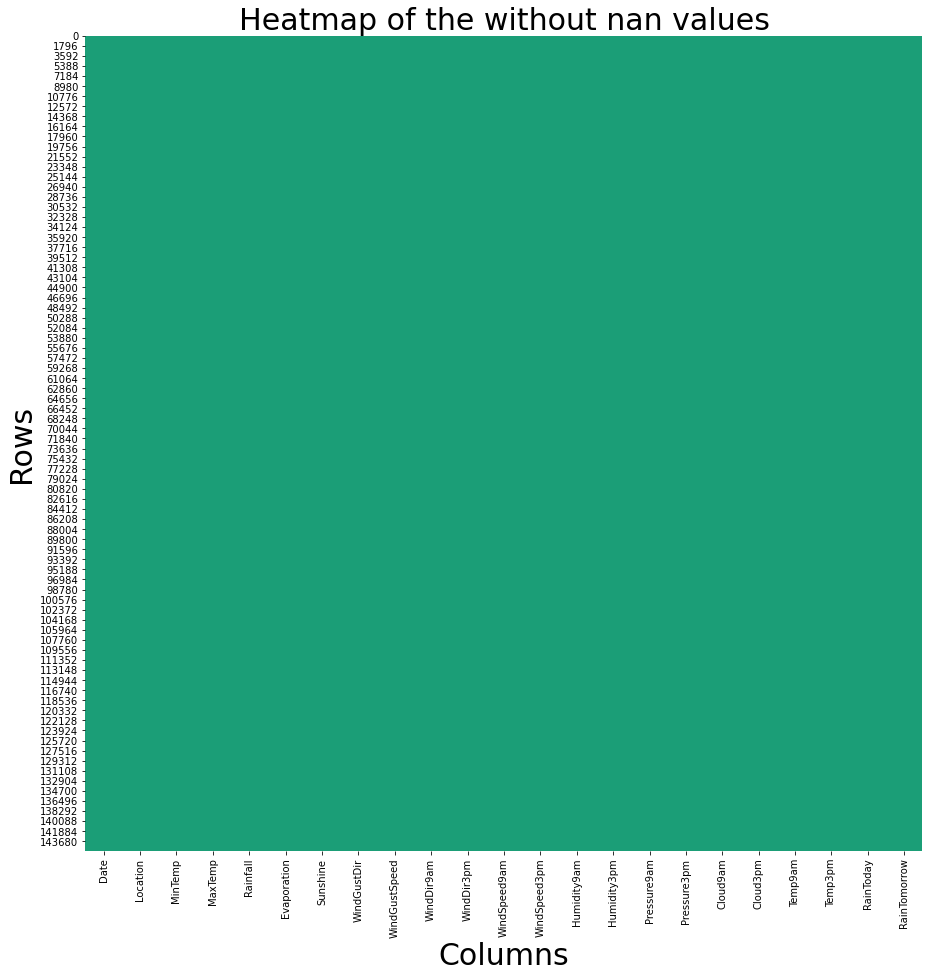

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(aus.isnull(),cbar=False,cmap='Dark2')
plt.title("Heatmap of the without nan values",fontsize=30)
plt.xlabel("Columns",fontsize=30)
plt.ylabel("Rows",fontsize=30)
plt.show()

In [23]:
aus.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
aus.isnull().sum().sum()

0

0.0    113580
1.0     31880
Name: RainToday, dtype: int64
0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64


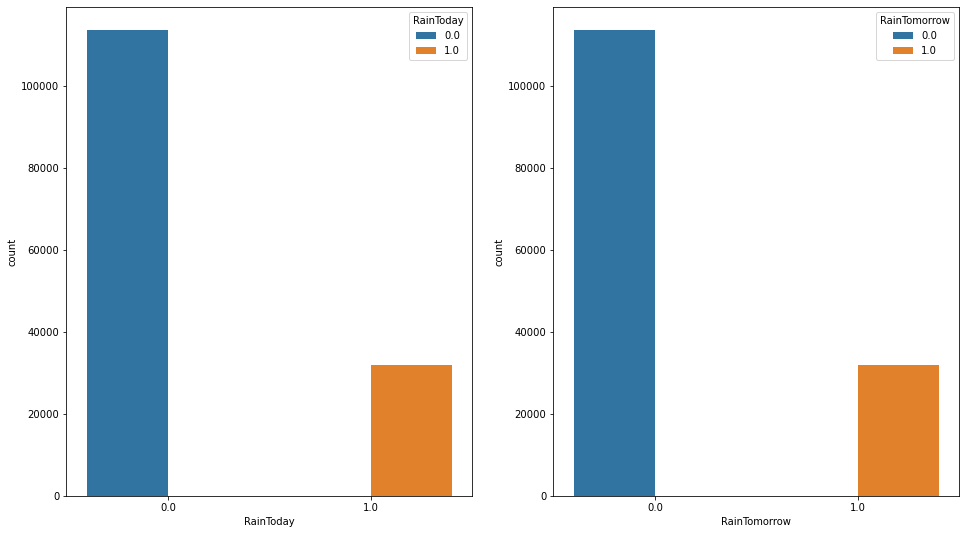

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
sns.countplot(x  = 'RainToday', hue = 'RainToday', data = aus )
print(aus.RainToday.value_counts())

plt.subplot(1,2,2)
sns.countplot(x  = 'RainTomorrow', hue = 'RainTomorrow', data = aus )
print(aus.RainTomorrow.value_counts())

### by seeing the above we can easily tell that rain today and rain tomorrow both are almost same

At 9 am, it is highest for direction N
At 3 pm, it is highest for direction SE


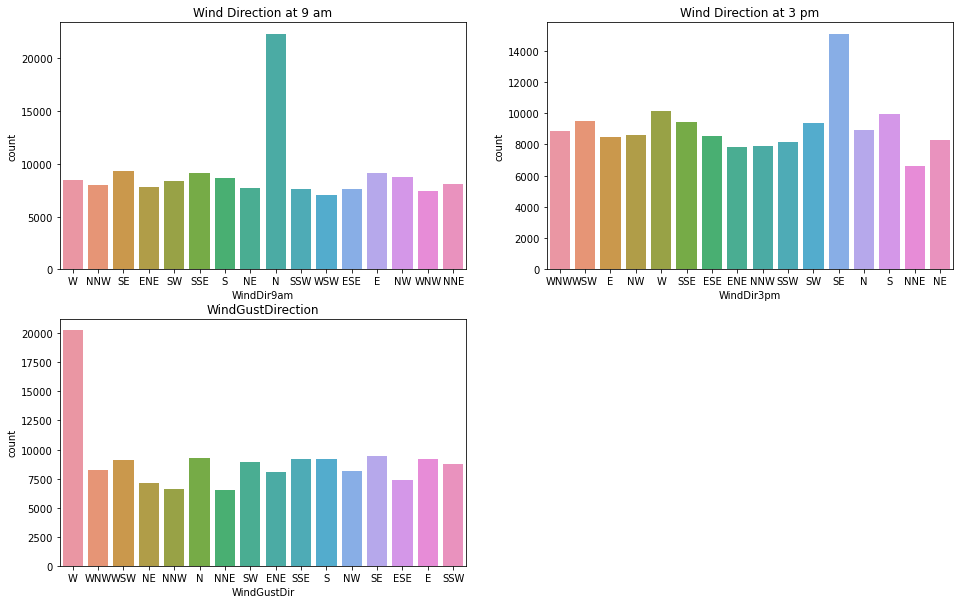

In [26]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(x  = 'WindDir9am', data = aus )
plt.title("Wind Direction at 9 am")
plt.subplot(2,2,2)
sns.countplot(x  = 'WindDir3pm', data = aus )
plt.title("Wind Direction at 3 pm")
plt.subplot(2,2,3)
sns.countplot(x  = 'WindGustDir', data = aus )
plt.title("WindGustDirection")

print('At 9 am, it is highest for direction N')
print('At 3 pm, it is highest for direction SE')

## 13. Encoding the categorical to numerical by label encoder

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
aus['Location'] = le.fit_transform(aus['Location'])
aus['WindDir9am'] = le.fit_transform(aus['WindDir9am'])
aus['WindDir3pm'] = le.fit_transform(aus['WindDir3pm'])
aus['WindGustDir'] = le.fit_transform(aus['WindGustDir'])
aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


## 14. Checking the correaltion

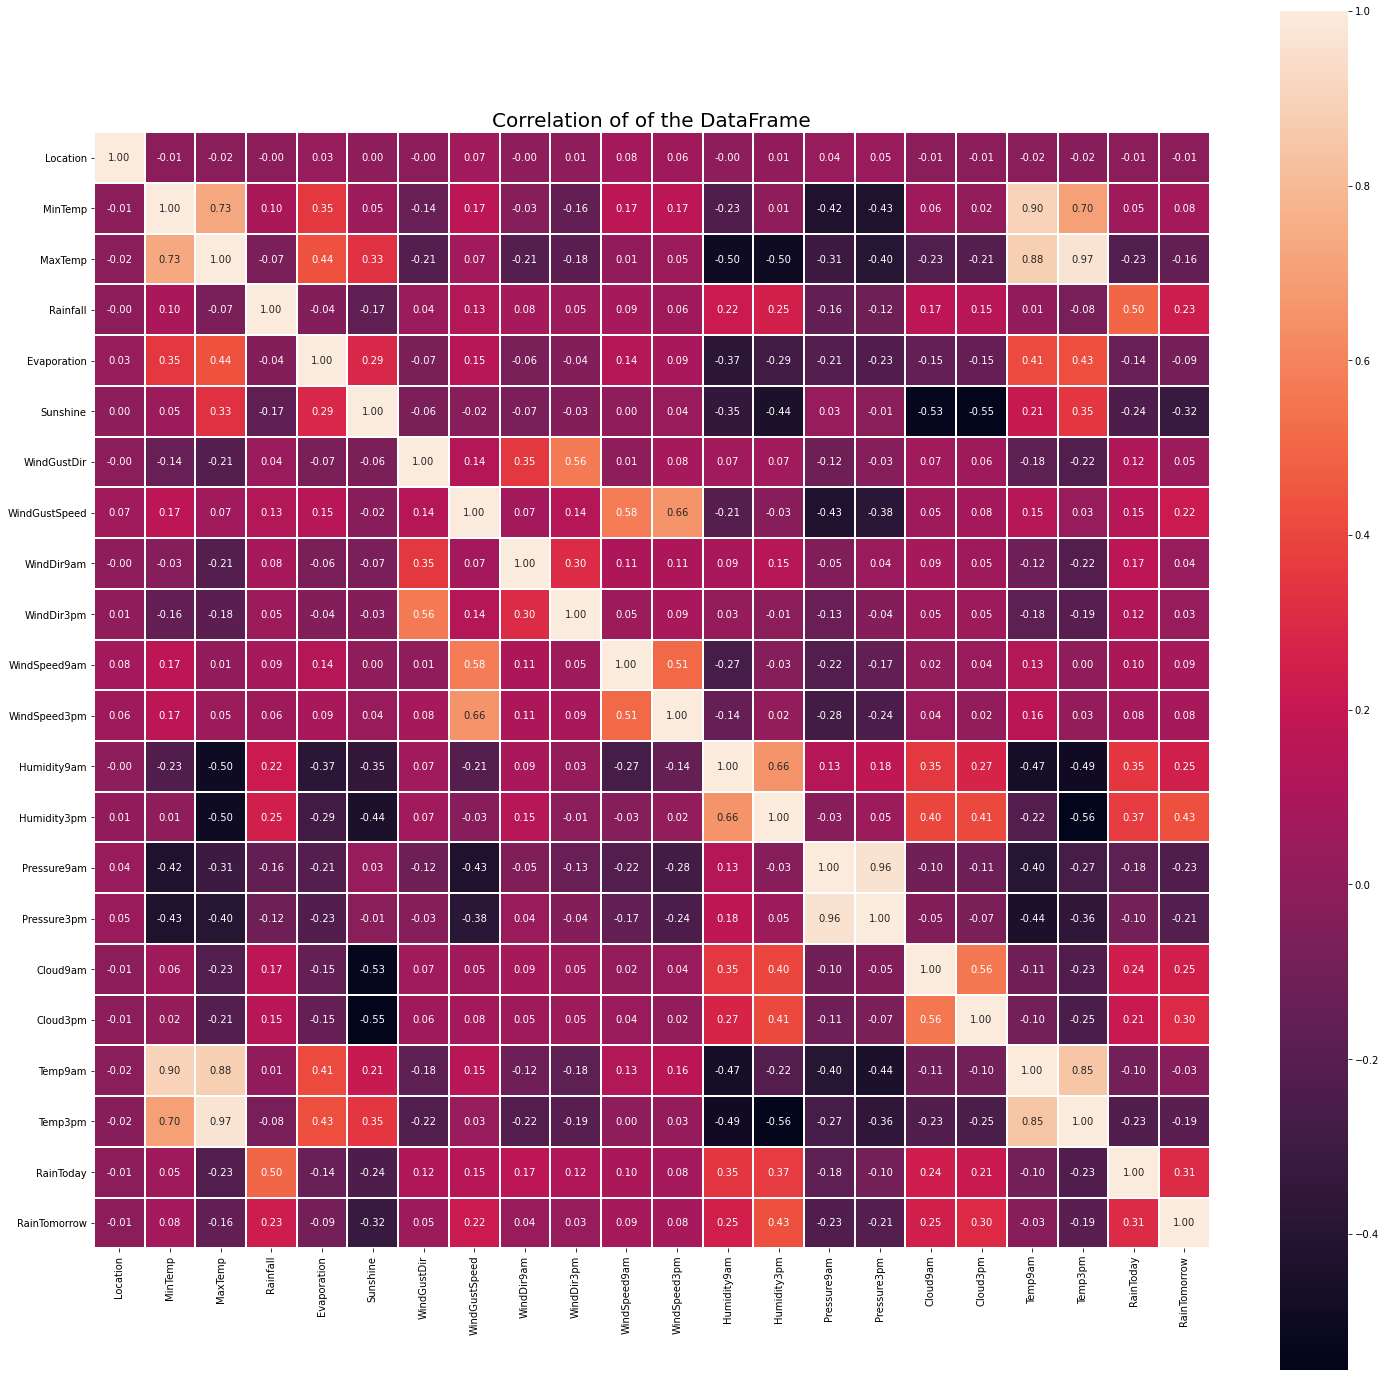

In [28]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(aus.corr(),linewidths=1, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Correlation of of the DataFrame',fontsize = 20)
plt.show()


In [29]:
print('Temp3pm and Temp9am highly correlated')
print('Humidity9am and Humidity3pm highly correlated')
print('MaxTemp and Temp9am highly correlated')
print('MaxTemp and Temp3pm highly correlated')
print('MinTemp and Temp9am highly correlated')
print('MinTemp and Temp3pm highly correlated')

Temp3pm and Temp9am highly correlated
Humidity9am and Humidity3pm highly correlated
MaxTemp and Temp9am highly correlated
MaxTemp and Temp3pm highly correlated
MinTemp and Temp9am highly correlated
MinTemp and Temp3pm highly correlated


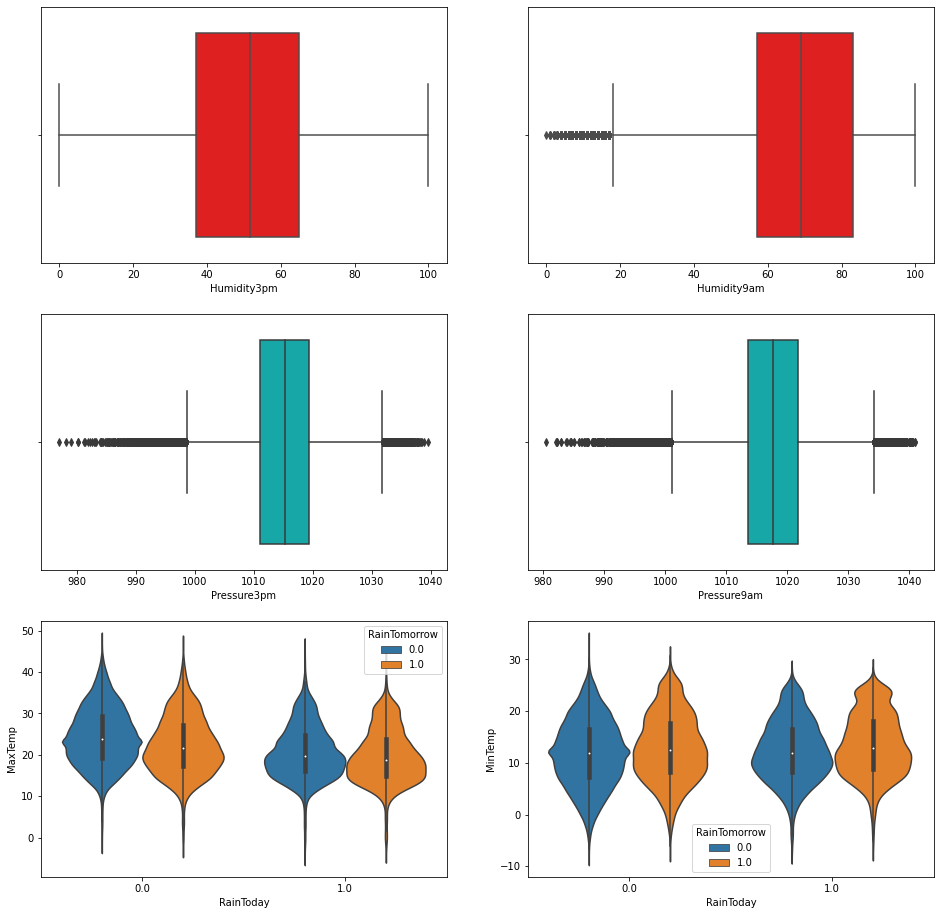

In [30]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
sns.boxplot(aus['Humidity3pm'],orient='v',color='r')
plt.subplot(3,2,2)
sns.boxplot(aus['Humidity9am'],orient='v',color='r')
plt.subplot(3,2,3)
sns.boxplot(aus['Pressure3pm'],orient='v',color='c')
plt.subplot(3,2,4)
sns.boxplot(aus['Pressure9am'],orient='v',color='c')
plt.subplot(3,2,5)
sns.violinplot(x='RainToday',y='MaxTemp',data=aus,hue='RainTomorrow')
plt.subplot(3,2,6)
sns.violinplot(x='RainToday',y='MinTemp',data=aus,hue='RainTomorrow')
plt.show()

In [31]:
aus.drop('Date',axis = 1,inplace=True)
aus

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.900000,0.6,5.468232,7.611178,13,44.00000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,2,7.4,25.100000,0.0,5.468232,7.611178,14,44.00000,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,2,12.9,25.700000,0.0,5.468232,7.611178,15,46.00000,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,2,9.2,28.000000,0.0,5.468232,7.611178,4,24.00000,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,2,17.5,32.300000,1.0,5.468232,7.611178,13,41.00000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,5.468232,7.611178,0,31.00000,9,1,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0.0,0.0
145456,41,3.6,25.300000,0.0,5.468232,7.611178,6,22.00000,9,3,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0.0,0.0
145457,41,5.4,26.900000,0.0,5.468232,7.611178,3,37.00000,9,14,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0.0,0.0
145458,41,7.8,27.000000,0.0,5.468232,7.611178,9,28.00000,10,3,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0.0,0.0


In [32]:
from scipy import stats

In [33]:
print('Shape of DataFrame Before Removing Outliers', aus.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)


## as we know that the thresolf value only lies from positive 3 sigma and negative sigma so if thresold greater than 3 we can drop them

In [34]:
aus=aus[(np.abs(stats.zscore(aus)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', aus.shape )

Shape of DataFrame After Removing Outliers (136608, 22)


In [35]:
aus=aus.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
aus.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## 15. By using the smote we can sample the data 

In [36]:
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
os = SMOTE()
X, y = os.fit_resample(aus.iloc[:,:-1], aus.iloc[:,-1])
count = Counter(y)
print(count)

Counter({0.0: 108477, 1.0: 108477})


##### now we can see that our data is normalised

In [38]:
X_train.shape

(173563, 18)

In [39]:
X_test.shape

(43391, 18)

In [40]:
y_train.shape

(173563,)

In [41]:
y_test.shape

(43391,)

In [42]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0.0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0.0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0.0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0.0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0.0


In [43]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

X = aus.drop(['RainTomorrow'], axis = 1)
y = aus['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"The training sets have the following shapes: {X_train.shape, y_train.shape}")
print(f"The testing sets have the following shapes: {X_test.shape, y_test.shape}")

The training sets have the following shapes: ((109286, 18), (109286,))
The testing sets have the following shapes: ((27322, 18), (27322,))


## 16. Building the model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 84.38%


In [47]:
print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

# Calculating null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print(f'Null Accuracy score: {round(null_accuracy * 100, 2)}%')

Training set score: 84.53%
Test set score: 84.38%
Null Accuracy score: 79.28%


# 17.Confusion matrix

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     21660
         1.0       0.70      0.43      0.53      5662

    accuracy                           0.84     27322
   macro avg       0.78      0.69      0.72     27322
weighted avg       0.83      0.84      0.83     27322



In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20613  1047]
 [ 3221  2441]]

True Positives(TP) =  20613

True Negatives(TN) =  2441

False Positives(FP) =  1047

False Negatives(FN) =  3221


<AxesSubplot:>

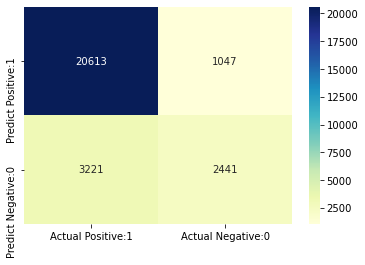

In [54]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [55]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

## Classification accuracy

In [56]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8438


## Classification Error

In [57]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1562


###  Precision

In [58]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9517


## Recall

In [59]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8649


## True positive rate

In [60]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8649


## False positive Rate

In [61]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3002


## specificity

In [62]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6998


In [63]:
y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.304211  , 0.695789  ],
       [0.55322562, 0.44677438],
       [0.93777673, 0.06222327],
       [0.93186947, 0.06813053],
       [0.96666925, 0.03333075],
       [0.94986227, 0.05013773],
       [0.67727569, 0.32272431],
       [0.97252687, 0.02747313],
       [0.72644242, 0.27355758],
       [0.40175998, 0.59824002]])

# FINALLY, PREDICTION OF RAINFALL TOMORROW 

In [64]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.304211,0.695789
1,0.553226,0.446774
2,0.937777,0.062223
3,0.931869,0.068131
4,0.966669,0.033331
5,0.949862,0.050138
6,0.677276,0.322724
7,0.972527,0.027473
8,0.726442,0.273558
9,0.401760,0.598240


In [65]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]


array([0.695789  , 0.44677438, 0.06222327, 0.06813053, 0.03333075,
       0.05013773, 0.32272431, 0.02747313, 0.27355758, 0.59824002])

In [66]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

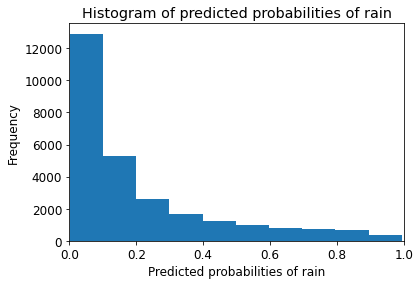

In [68]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

# CONCLUSION

#### 1. The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

#### 2.Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

#### 3.The model shows no signs of overfitting.

#### 4.Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

#### 5.Increasing the threshold level results in increased accuracy.

